In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.sample(5)

,sms,label
653,"Wait, do you know if wesleys in town? I bet sh...",0
1648,Evening * v good if somewhat event laden. Will...,0
1855,They did't play one day last year know even th...,0
4343,Ha! I wouldn't say that I just didn't read any...,0
2879,Hey Boys. Want hot XXX pics sent direct 2 ur p...,1


In [4]:
df.shape   # 5574 sample messages and 2 columns

(5574, 2)

In [5]:
# Stages: 
# 1. Data Cleaning 
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation 
# 6. Improvement 
# 7. Website
# 8. Deployment

In [6]:
# 1. Data Cleaning

In [7]:
# Check for missing values:
df.isnull().sum()

sms      0
label    0
dtype: int64

In [8]:
# Check for duplicate values: 
df.duplicated().sum()

403

In [9]:
# Removing duplicates:
df = df.drop_duplicates(keep = 'first')

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(5171, 2)

In [12]:
# 2. EDA

In [13]:
df['label'].value_counts()  # 0 -> Ham, 1 -> Spam

label
0    4518
1     653
Name: count, dtype: int64

In [14]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


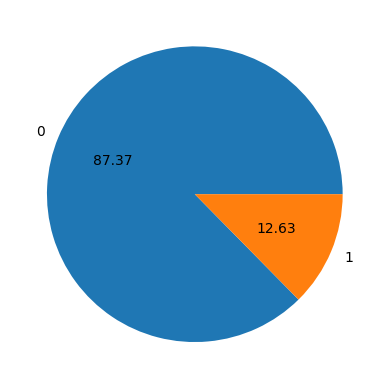

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels = ['0','1'], autopct = "%0.2f")
plt.show()

In [16]:
!pip install nltk

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sprav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['no_of_characters'] = df['sms'].apply(len)

In [20]:
df['no_of_characters'].sample(5)

3982     56
3374     66
4467     24
1578    185
1630     84
Name: no_of_characters, dtype: int64

In [21]:
df.head()

,sms,label,no_of_characters
0,"Go until jurong point, crazy.. Available only ...",0,112
1,Ok lar... Joking wif u oni...\n,0,30
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156
3,U dun say so early hor... U c already then say...,0,50
4,"Nah I don't think he goes to usf, he lives aro...",0,62


In [22]:
df['no_of_words'] = df['sms'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
df.head()

,sms,label,no_of_characters,no_of_words
0,"Go until jurong point, crazy.. Available only ...",0,112,24
1,Ok lar... Joking wif u oni...\n,0,30,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37
3,U dun say so early hor... U c already then say...,0,50,13
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15


In [24]:
df['no_of_sentences'] = df['sms'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,sms,label,no_of_characters,no_of_words,no_of_sentences
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2
1,Ok lar... Joking wif u oni...\n,0,30,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2
3,U dun say so early hor... U c already then say...,0,50,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1


In [26]:
df[['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,5171.000000,5171.000000,5171.000000
mean,80.332431,18.606459,1.973893
std,58.333188,13.388223,1.458880
min,3.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,62.000000,15.000000,1.000000
75%,120.000000,26.500000,2.000000
max,911.000000,220.000000,38.000000


In [27]:
df[df['label'] == 1][['no_of_characters','no_of_words','no_of_sentences']].describe()   # Analysing Spam messages

,no_of_characters,no_of_words,no_of_sentences
count,653.000000,653.000000,653.000000
mean,138.710567,27.768760,2.986217
std,29.818940,6.987509,1.494815
min,14.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
df[df['label'] == 0][['no_of_characters','no_of_words','no_of_sentences']].describe()    # Analysing Ham messages

,no_of_characters,no_of_words,no_of_sentences
count,4518.000000,4518.000000,4518.000000
mean,71.894865,17.282205,1.827579
std,56.590179,13.572746,1.394245
min,3.000000,1.000000,1.000000
25%,35.000000,8.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,911.000000,220.000000,38.000000


In [29]:
!pip install seaborn

In [30]:
import seaborn as sns

<Axes: xlabel='no_of_characters', ylabel='Count'>

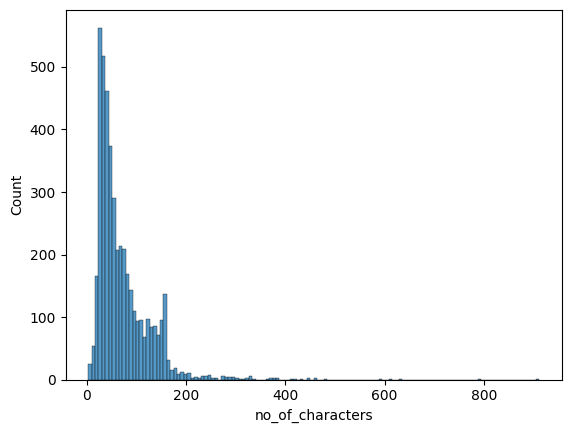

In [31]:
sns.histplot(df[df['label'] == 0]['no_of_characters'])   # Histogram for Ham messages

<Axes: xlabel='no_of_characters', ylabel='Count'>

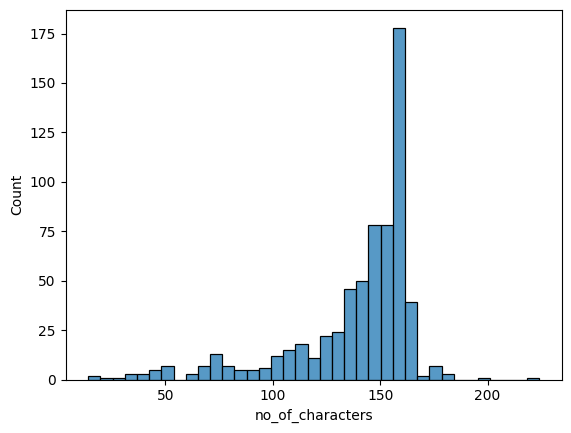

In [32]:
sns.histplot(df[df['label'] == 1]['no_of_characters'])   # Histogram for Spam messages

In [33]:
# From the above analysis, we can see that Spam messages are usually longer

<Axes: xlabel='no_of_characters', ylabel='Count'>

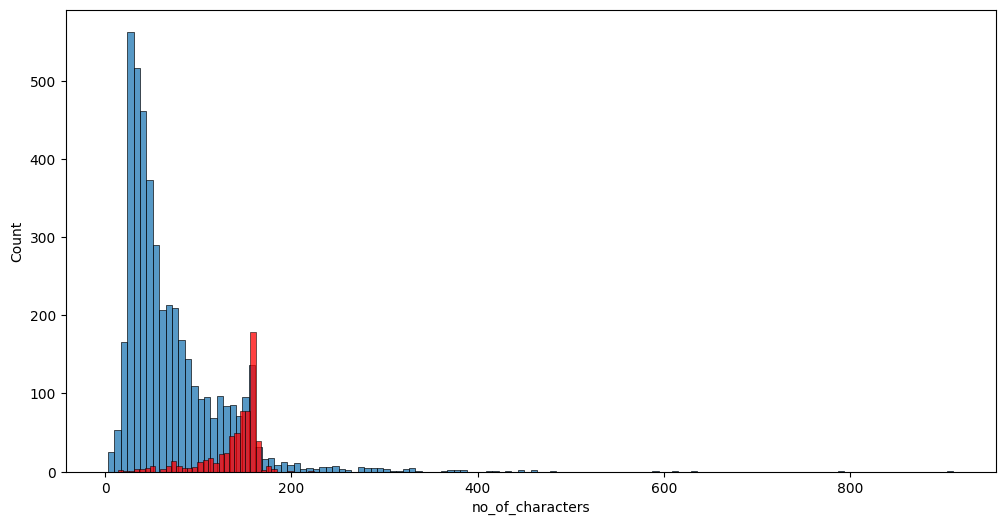

In [34]:
# Comparison:
plt.figure(figsize = (12,6))
sns.histplot(df[df['label'] == 0]['no_of_characters'])   # Histogram for Ham messages
sns.histplot(df[df['label'] == 1]['no_of_characters'],color = 'red')   # Histogram for Spam messages

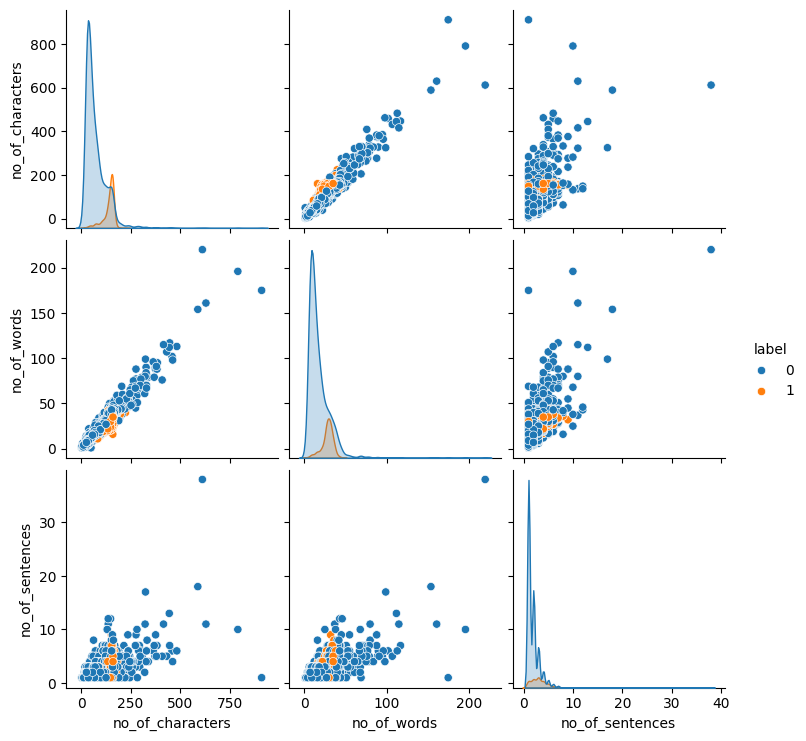

In [35]:
sns.pairplot(df,hue = 'label')

In [36]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['float', 'int']).columns

# Drop non-numeric columns
df_numeric = df.drop(columns=non_numeric_columns)

# Compute correlation
correlation_matrix = df_numeric.corr()

<Axes: >

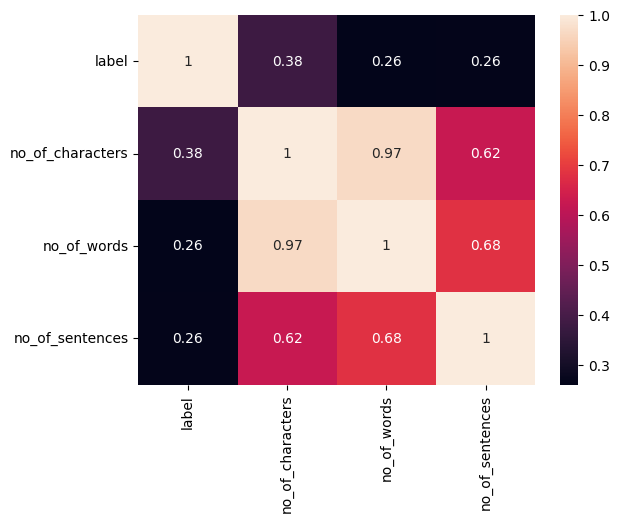

In [37]:
sns.heatmap(df_numeric.corr(),annot=True)    
# no_of_characters has the highest correlation with label. 
# So, if we need to choose one out of the three columns, it would be no_of_characters.

In [38]:
# 3. Data Preprocessing
# Lower Case
# Tokenization
# Removing speical characters
# Removing stop words and punctuations (stop words: words that do not contribute to the meaning of a sentence. Eg: is,of,the)
# Stemming (Converting similar meaning words to one single word. Eg: dance,danced,dancing,etc.)

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sprav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()  # Creating an object
ps.stem('driving')

'drive'

In [43]:
def transform_text(text):
    #Lower case:
    text = text.lower()
    # Word Tokenization: 
    text = nltk.word_tokenize(text)

    # Removing special characters: 
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Stopwords and punctuations:
    
    text = y[:]  # cloning of list
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming:
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [44]:
transform_text('Did you like my presentation on ML?')

'like present ml'

In [45]:
df['transformed_text'] = df['sms'].apply(transform_text)

In [46]:
df.head()

,sms,label,no_of_characters,no_of_words,no_of_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...\n,0,30,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,50,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1,nah think goe usf live around though


In [47]:
# Generating word cloud for Spam and Ham:

In [48]:
!pip install wordcloud

In [49]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500, min_font_size = 10,background_color = 'white')

In [50]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep = " "))  # Spam word cloud

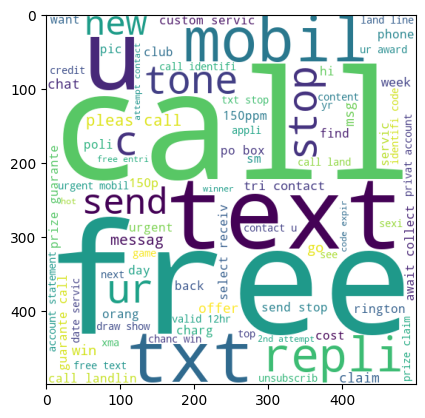

In [51]:
plt.imshow(spam_wc)    # This shows the words which are mostly found in Spam messages

In [52]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep = " "))  # Ham word cloud

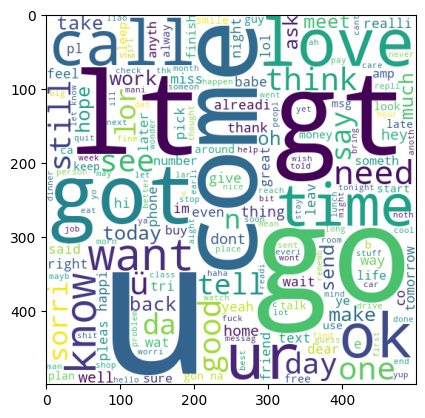

In [53]:
plt.imshow(ham_wc)    # This shows the words which are mostly found in Ham messages

In [54]:
spam_corpus = []

for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

9982

In [56]:
from collections import Counter
Counter(spam_corpus)       # This creates a dictionary of the words found in Spam messages, 
                           #  along with the no. of time they are used in the entire dataset

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 120,
         'ur': 119,
         'mobil': 114,
         'stop': 108,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 61,
         'urgent': 58,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'guarante': 43,
         'custom': 42,
         'messag': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'go': 33,
         'offer': 33,
         'line': 33,
         'want': 32,
         'receiv': 3

In [57]:
# To find the 30 most common words in spam messages:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 120),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 108),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 61),
 ('urgent', 58),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

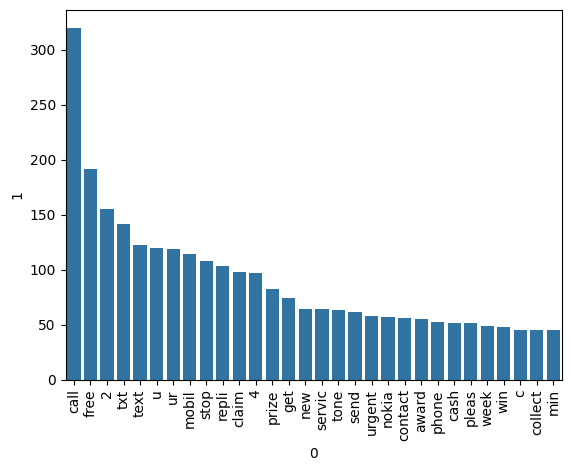

In [58]:
# Barplot for the 30 most common words used in Spam messages:

sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [59]:
ham_corpus = []

for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
len(ham_corpus)

35937

In [61]:
Counter(ham_corpus)

Counter({'u': 897,
         'go': 407,
         'get': 351,
         '2': 288,
         'gt': 288,
         'lt': 287,
         'come': 278,
         'got': 239,
         'know': 237,
         'like': 236,
         'call': 235,
         'love': 222,
         'time': 220,
         'ok': 218,
         'good': 215,
         'want': 209,
         'ur': 203,
         'day': 195,
         'ü': 173,
         'need': 171,
         'one': 166,
         '4': 162,
         'lor': 159,
         'home': 152,
         'think': 150,
         'see': 148,
         'take': 144,
         'still': 144,
         'da': 142,
         'tell': 133,
         'make': 129,
         'say': 127,
         'back': 127,
         'today': 124,
         'hope': 123,
         'dont': 123,
         'n': 121,
         'ask': 121,
         'sorri': 121,
         'send': 120,
         'r': 120,
         'work': 119,
         'hi': 116,
         'meet': 112,
         'oh': 111,
         'well': 110,
         'night': 110,
   

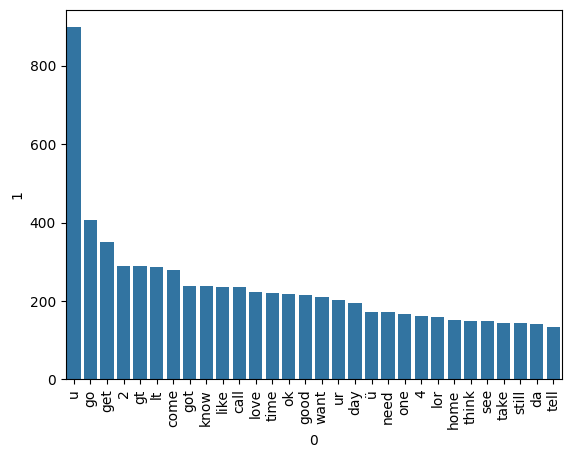

In [62]:
# Barplot for the 30 most common words used in Ham messages:

sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [63]:
# 4. Model Building
# Naive Bayes Classification

In [64]:
# Text Vectorization
# Count Vectorizer can be used for Bag of Words vectorization
# Using TFIDF Vectorizer

In [65]:
!pip install scikit-learn

In [66]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [67]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [68]:
X.shape

(5171, 6782)

In [69]:
y = df['label'].values

In [70]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)  # 20% data is given foor testing

In [73]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [74]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [75]:
# Comparing different Naive Bayes models and choosing one among them:

In [76]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))  # Accuracy Score = 86.85%
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)) # Precision Score = 48.62% (Very low!)

0.8685990338164251
[[793 112]
 [ 24 106]]
0.48623853211009177


In [77]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))  # Accuracy Score = 95.36%
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2)) # Precision Score = 100%

0.9536231884057971
[[905   0]
 [ 48  82]]
1.0


In [78]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))  # Accuracy Score = 97.10%
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3)) # Precision Score = 96.29%

0.9710144927536232
[[901   4]
 [ 26 104]]
0.9629629629629629


In [79]:
#Choosing Multinomial Naive Bayes model
# Because precision score is high

In [80]:
## Steps to be performed when a new email/sms is received:
## Step1: Preprocess the message using the transform_text() function defined above 
## Step2: Vectorization
## Step3: Apply the Algorithm (Multinomial Naive Bayes Classification in this case)

In [81]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))